# Introduction à Spark

#### Quelle différence entre Hadoop et Spark ?

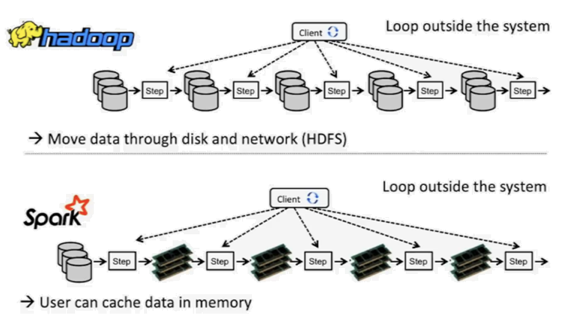

#### Pourquoi Spark ?

Avec Hadoop, afin d’offrir une expérience complète aux développeurs et aux utilisateurs, il était nécessaire d’avoir :
- PIG, pour exécuter des batchs Map/Reduce de traitements des données.
- Hive, Impala, pour offrir une interface permettant d’effectuer des requêtes interactives sur les données historisées. Pour rappel, ces outils permettent d’interpréter des commandes de type SQL qui seront exécutés sous forme de traitements Map/Reduce sur les données du cluster. L’objectif étant de s’affranchir de la syntaxe lourde et complexe de PIG.
- Flume, pour la récupération de données au fil de l’eau et Storm pour les traitements en Streaming.
- Mahout, pour faire du machine learning
Le framework Hadoop permet de programmer l’exécution des tâches suivant la puissance de calcul, de monitorer l’exécution des tâches et de ré-exécuter les tâches dont l’exécution aurait échouée.

Spark de son côté, propose de répondre à toutes ces problématiques, de façon simple et efficace au travers d’un framework.


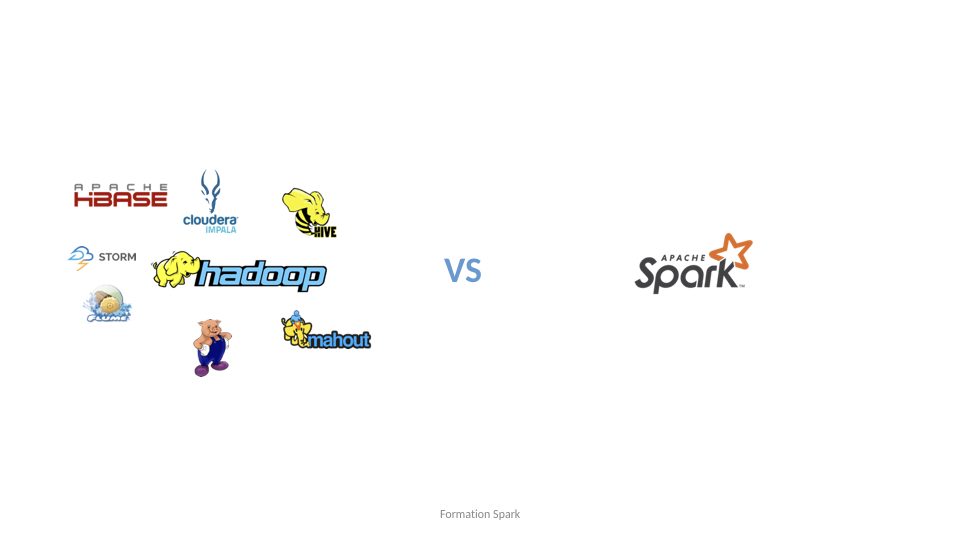

Avant Spark, on avait Hadoop : excellente capacité de mise à l’échelle et de traitement en parallèle. L’exploitation d’une plateforme Hadoop permettait de traiter des données de masse rapidement, à faible coût et avec une résilience à toute épreuve.
La démocratisation de cette technologie a notamment été possible grâce à la chute du coût de stockage sur disque.

La promesse de Spark est ambitieuse : regrouper dans un framework, plusieurs fonctionnalités de l’écosystème Hadoop avec les mêmes garanties de résilience mais en plus rapide et pour moins cher.
Pour cela Spark s’appuie principalement sur le traitement de données en mémoire vive, en profitant de la baisse de prix de la RAM.

### Spark VS Hadoop

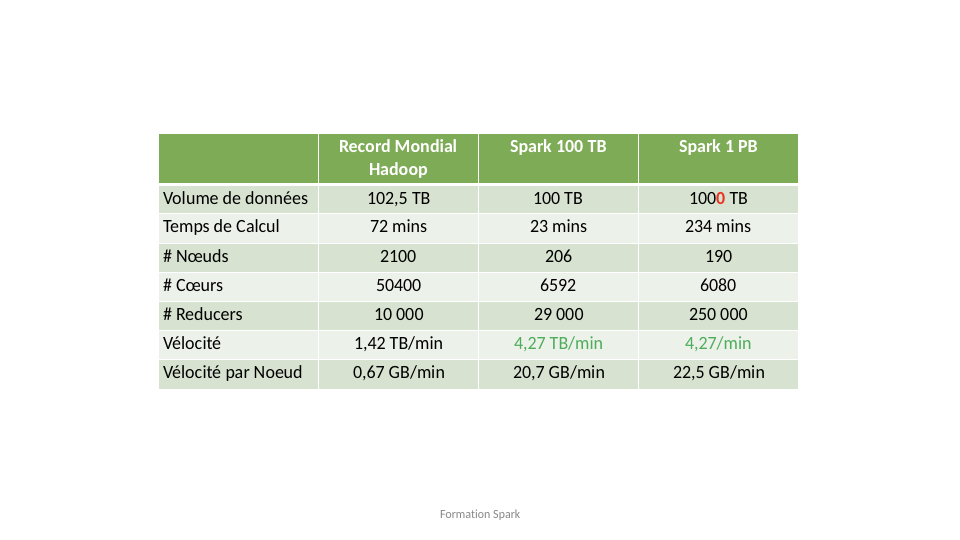

En 2013, Hadoop et son MapReduce détenait encore la vitesse de tri la plus importante au sortBenchmark.
Avec 2100 nœuds et 50 000 cœurs physiques, il était capable de traiter 100TB en 72 minutes soit 1.42 TB/min.

En 2014, Spark explose le records du sortBenchmark en traitant ces mêmes 100TB en 23 minutes avec 200 nœuds et 6600 cœurs virtualisés. Cela équivaut à 4.27 TB/min.

Le plus impressionnant reste la capacité de traitement par nœud : 0.67GB/min pour Hadoop contre 20.7GB/min avec Spark soit plus de 30 fois  plus rapidement.  En novembre 2016, l’équipe de Databricks est au cœur d’un nouveau record en proposant la solution Cloud la moins chère pour traiter de gros volumes de données avec $1.44 par TB. Cette solution s’appuie bien évidemment sur Spark.

Si cela vous intéresse, n’hésitez pas à jeter un coup d’œil sur http://sortbenchmark.org/

#### Variété de Spark

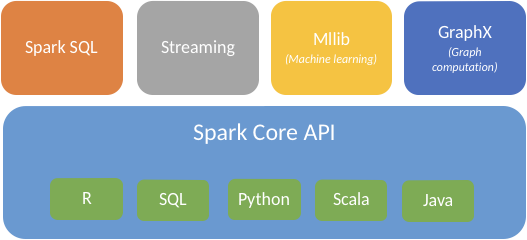

Si l’on doit résumer les caractéristiques de Spark…
- C’est un Framework de calcul distribué écrit en Scala, sous licence Apache.
- Il propose différentes API de programmation, ce qui permet de décupler ses capacités et de le rendre plus accessible aux développeurs : Java, Scala, Python, R et SQL.
- Il ne persiste pas ou peu (géré par le développeur) de données sur disque ce qui en fait un outil très performant mais inévitablement gourmand en mémoire vive. Lorsque la mémoire vive est limitée par rapport au jeu de données à traiter, il est possible de sérialiser la donnée ou encore de la persister sur disque.
- Regroupe de nombreuses fonctionnalités sous un seul framework : Les dataframes très utiles dans le déploiement d’algorithmes de Machine Learning, des librairies ML performantes, du Streaming Near Real-time, de la modélisation sous forme de graphes…

### Les structures de données : RDD 

« Un RDD […] est une collection résiliente d’éléments qui peuvent être traités en parallèle. »

« Un RDD […] est une collection partitionnée et distribuée, accessible en lecture seule. Ses éléments peuvent être traités en parallèle. »

Les RDD sont des collections de données immutables. On ne peut donc pas les modifier, mais leur appliquer des transformations pour obtenir un nouveau RDD.

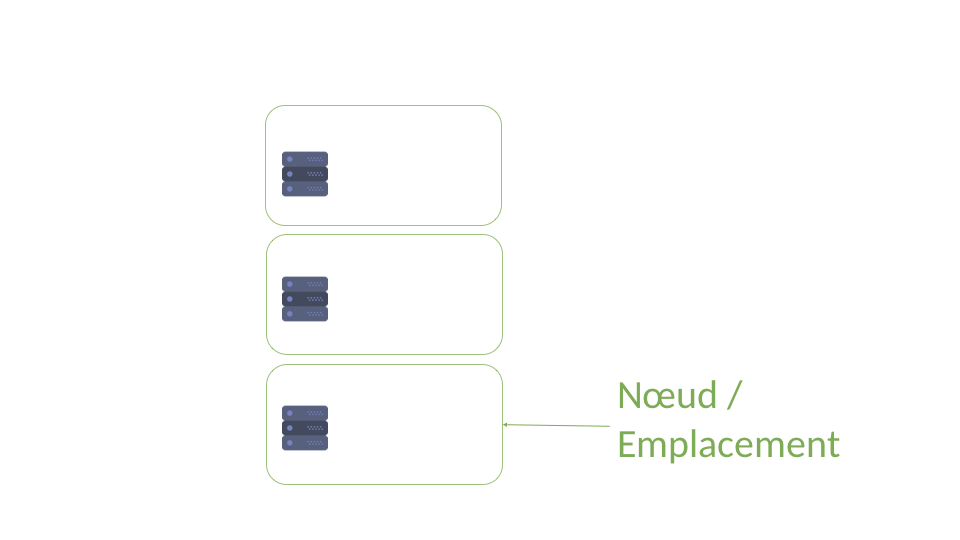

Un cluster de noeuds : infrastructure typique du big data.

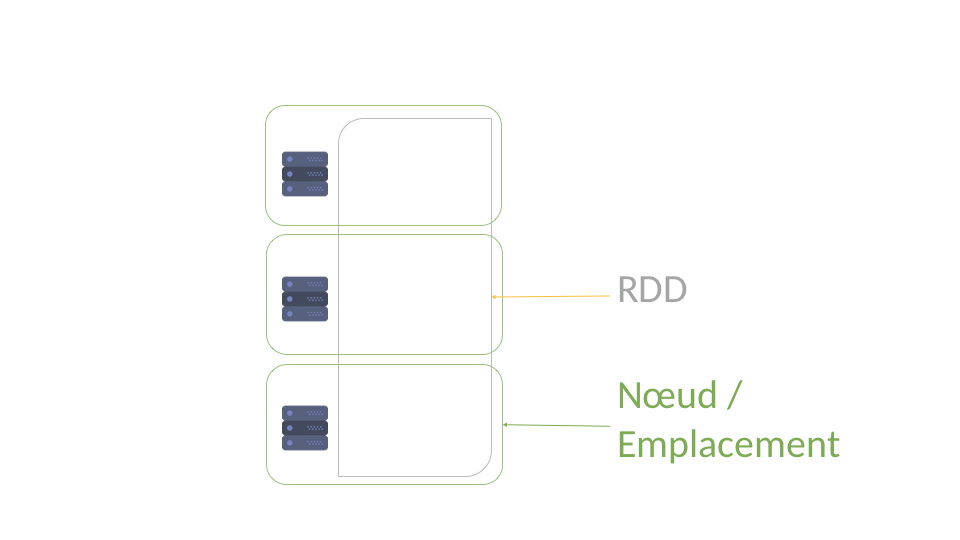

La RDD est une structure distribuée sur plusieurs noeuds

### Le partitionnement

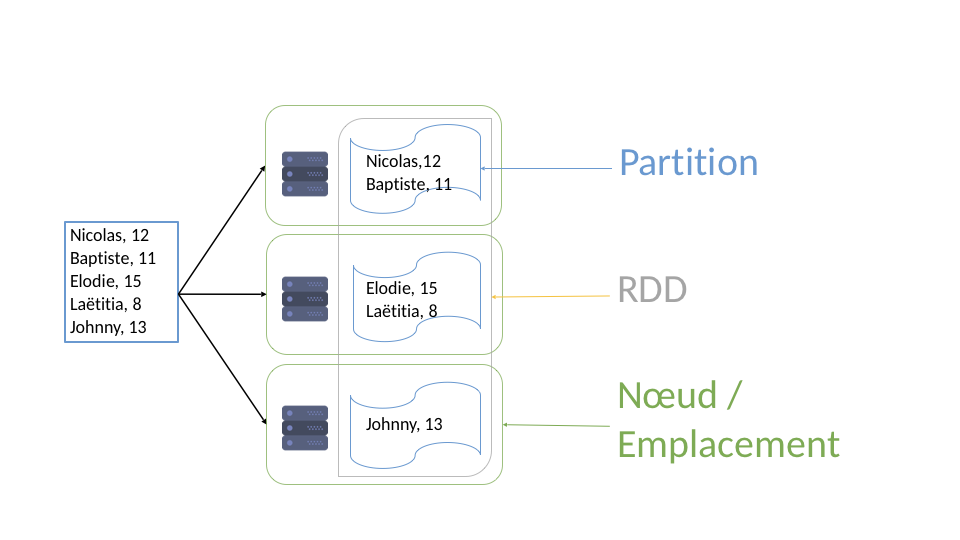

Pour permettre à chaque exécuteur d'effectuer un travail en parallèle, Spark divise les données en morceaux appelés partitions. Une partition est une collection de lignes qui se trouvent sur une machine physique de votre cluster. Les partitions d'un DataFrame représentent la façon dont les données sont physiquement réparties sur le cluster de machines pendant l'exécution. Si vous avez une seule partition, Spark n'aura qu'un seul parallélisme, même si vous avez des milliers d'exécuteurs. Si vous avez de nombreuses partitions mais un seul exécuteur, Spark aura toujours un parallélisme d'un seul car il n'y a qu'une seule ressource de calcul.

Une chose importante à noter est qu'avec les DataFrames, vous ne manipulez pas (pour la plupart) les partitions manuellement ou individuellement. Vous spécifiez simplement des transformations de haut niveau des données dans les partitions physiques, et Spark détermine comment ce travail sera effectivement exécuté sur le cluster. Il existe des API de niveau inférieur (via l'interface RDD).

Spark possède plusieurs abstractions de base : Datasets, DataFrames, SQL Tables, et Resilient Distributed Datasets (RDDs). Ces différentes abstractions représentent toutes des collections de données distribuées. Les DataFrames, qui sont disponibles dans tous les langages, sont les plus simples et les plus efficaces.

### Les structures de données : RDD & transformation/action

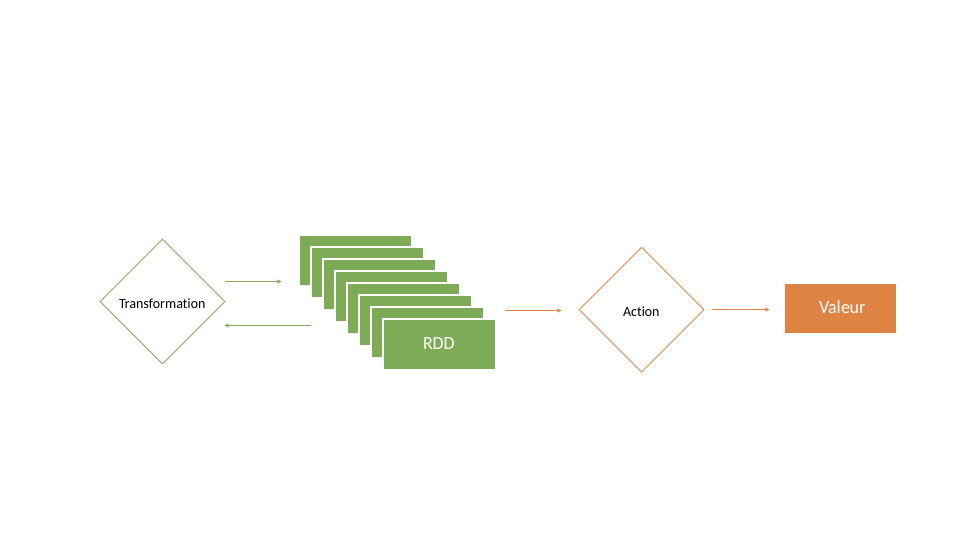

Le moteur de calcul Spark est par nature paresseux, tant que vous ne lui demandez pas de vous montrer un résultat, il ne va pas faire l'opération. Il va vous dire si votre opération peut se faire, il va établir un plan de travail mais pour qu'il fasse quelque chose, il faut le contraindre.

Une transformation est une opération sur un objet Spark. Comme les objets Spark sont immutables, une transformation est l'opération par laquelle on peut créer une nouvelle structure de données à partir d'une précédente strucuture de donnée.  
Il existe deux types de transformation (voir schéma plus bas):
- Narrow dependencies, qui sont des transformations qui permettent de maintenir le paralèlisme entre les différentes partitions (ex : filtre ou map)
- Wide dependecies qui sont des transformations qui contraignent la donnée à être échangée entre les différentes partitions (ex : jointure entre deux Dataframe ne respectant pas le même partitionnement pour la clé de jointure)

Il est préférable d'éviter le plus possible les Wide Dependecies (en ordonnant de la même manière les clés avant une jointure).

Une action est une opération qui met à mal la paresse de Spark et l’oblige à produire un output. Par une action, on remonte les résultats d'un traitement dans le driver.

#### Exemple de transformation

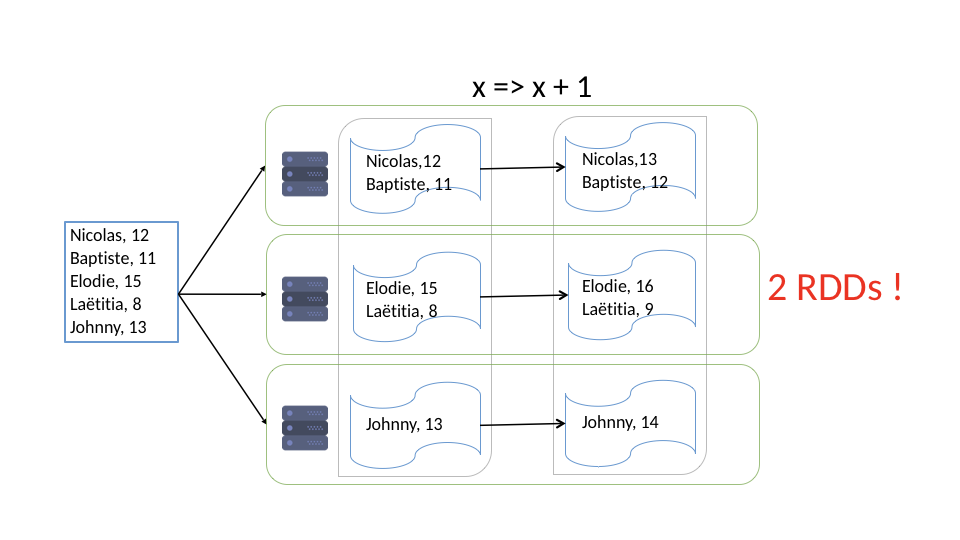

#### Exemple d'action

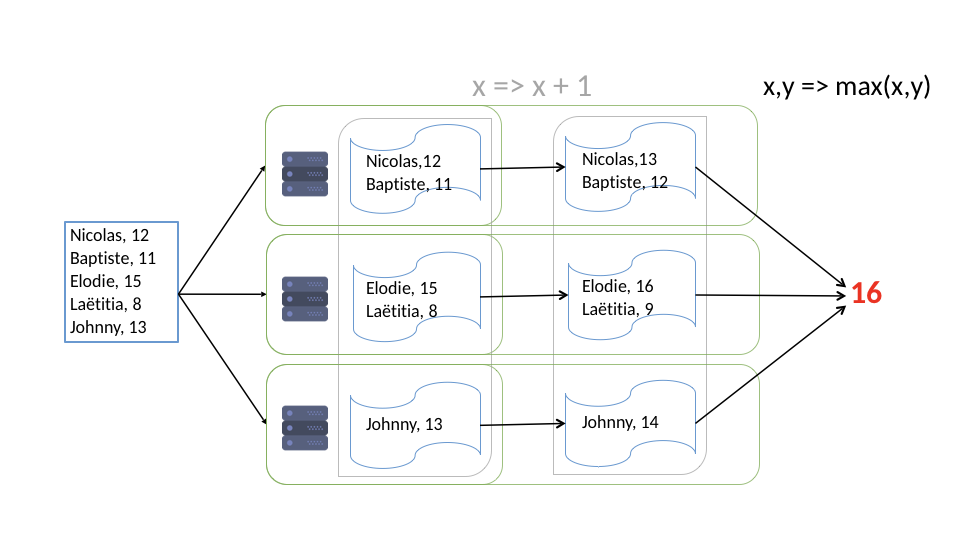

### Les autres structures de données

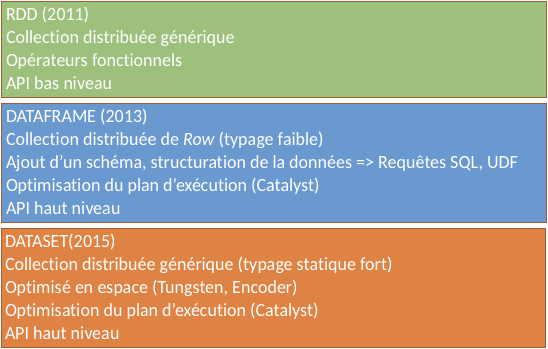

## L'application Spark

L'application Spark est composée d'un Driver et de plusieurs Worker qui sont des process ayant des rôles différents.

Le driver est resonsable principalement de trois choses :
- maintenir des information sur votre application Spark
- répondre aux commandes d'un programme utilisateur.
- analyser, distribuer et planifier le travail entre les exécuteurs.

Le processus Driver est absolument essentiel - c'est le cœur d'une application Spark et il maintient toutes les informations pertinentes pendant la durée de vie de l'application.

Les exécuteurs sont responsables de l'exécution effective du travail que le pilote leur assigne. Cela signifie que chaque exécuteur n'est responsable que de deux choses :
- l'exécution du code qui lui est assigné par le pilote ;
- et rapporter l'état du calcul sur cet exécuteur au nœud du pilote.



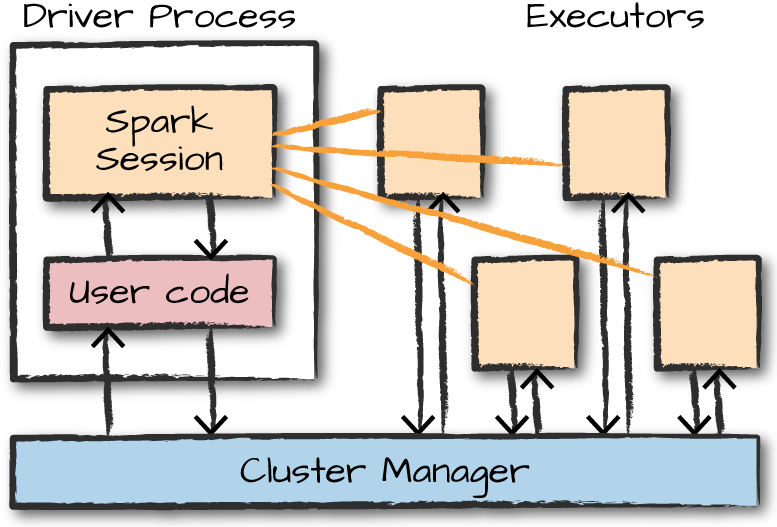

## Les transformations

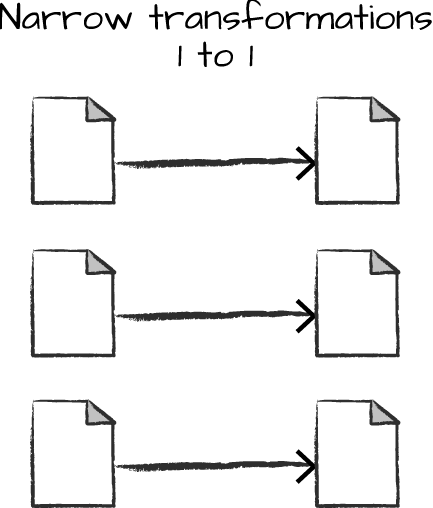

Deux types de transformation :
- Quand une seule partition contribue à un maximum d'une partition de sortie, on parle de "narrow dependecies"
- Quand les partitions d'entrée contribuent à de nombreuses partitions de sortie, on parle de "wide dependecies"

Avec les narrow dependecies, Spark effectue automatiquement une opération appelée pipelining, ce qui signifie que si nous spécifions plusieurs filtres sur des DataFrames, ils seront tous exécutés en mémoire. Il n'en va pas de même pour les shuffles. Lorsque nous effectuons un shuffle, Spark écrit les résultats sur le disque.

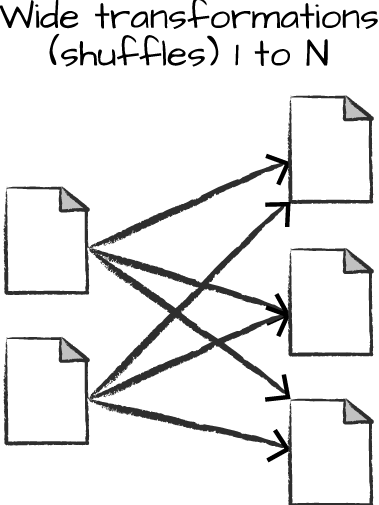